### Data information

Dataset has the following attributes:

- type: Event type
- duration:  Duration of the event, if it is a fixation, then it is the fixation duration
- sac_amplitude: Amplitude of the eye saccades
- sac_endpos_x: `x coordinate` of saccades end position 
- sac_endpos_y: `y coordinate` of saccades end position
- sac_startpos_x: `x coordinate` of saccades start position
- sac_startpos_y: `y coordinate` of saccades start position
- sac_vmax: Maximal velocity of saccade
- fix_avgpos_x: Average `x coordinate` position 
- fix_avgpos_y: Average `y coordinate` position
- fix_avgpupilsize: Average pupil size of the eye
- overlapping: Whether there are two bounding boxes that are overlapping (e.g. a face, being partially occluded by another head)
- fix_samebox: Whether the current fixation is within the same bounding box (e.g. same face) as the previous one.
- id: Subject ID
- picID: Picture ID
- trialnum: Trial Number
- fix_type: Type of the fixation.
- onset: Event onset time.


### Task Summary
- Analyse dataset and find relation between variables if any

In [196]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/sub-45/eeg/sub-45_task-WLFO_events.tsv', sep='\t')
df = df.rename(str.strip, axis='columns')

df.head(2)

type  duration  sac_amplitude  sac_endpos_x  sac_endpos_y  sac_startpos_x  \
0   __       0.0            0.0           0.0           0.0             0.0   
1  200       0.0            0.0           0.0           0.0             0.0   

   sac_startpos_y  sac_vmax  fix_avgpos_x  fix_avgpos_y  fix_avgpupilsize  \
0             0.0       0.0           0.0           0.0               0.0   
1             0.0       0.0           0.0           0.0               0.0   

   overlapping  fix_samebox  id  picID  trialnum fix_type      onset  
0            0          0.0 NaN    NaN       NaN      NaN   0.001953  
1            0          0.0 NaN    NaN       NaN      NaN  43.265625

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9279 entries, 0 to 9278
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9279 non-null   object 
 1   duration          9279 non-null   float64
 2   sac_amplitude     8228 non-null   float64
 3   sac_endpos_x      8228 non-null   float64
 4   sac_endpos_y      8228 non-null   float64
 5   sac_startpos_x    8228 non-null   float64
 6   sac_startpos_y    8228 non-null   float64
 7   sac_vmax          6778 non-null   float64
 8   fix_avgpos_x      3683 non-null   float64
 9   fix_avgpos_y      3683 non-null   float64
 10  fix_avgpupilsize  3683 non-null   float64
 11  overlapping       9279 non-null   int64  
 12  fix_samebox       4734 non-null   float64
 13  id                171 non-null    float64
 14  picID             171 non-null    float64
 15  trialnum          171 non-null    float64
 16  fix_type          2461 non-null   object 


we observe that: 
- 'type' and 'fix_type' are categorial values.
- duration, sac_amplitude, sac_endpos_x, sac_endpos_y, sac_startpos_x, sac_startpos_y, sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize, overlapping, fix_samebox, id, picID, trailnum, onset are numerical attributes
 

### Understanding categorical variables 

In [198]:
df['fix_type'].unique()

array([nan, 'NonetoNone', 'NonetoHF', 'HFtoNone', 'HFtoHF', 'NonetoOS',
       'OStoNone', 'NonetoHH', 'HHtoNone', 'OLtoNone', 'HFtoNH',
       'NHtoNone', 'NonetoNH', 'OStoOS', 'NHtoNH', 'NHtoHF', 'OLtoHF',
       'HFtoHH', 'HHtoHH', 'HHtoHF', 'NonetoOL', 'OStoHF', 'OStoNH',
       'OStoHH', 'HFtoOS'], dtype=object)

### Types:
- NonetoNone:Background to Background
- NonetoHF - HFtoNone: Background to Human Face - Human Face to Backgound
- HFtoHF: Human Face to Human Face
- NonetoOS - OStoNone: Background to Outside the image - Outside to background
- NonetoHH - HHToNone: Backgound to human head, in difference to human face
- OLtoNone: Overlapping bounding box, no unique attribution possible
- HFtoNH: Human Face to non human head (e.g. cardboard, or mannequin)
- NHtoNone: Non human head (e.g. cardboard, or mannequin) to Backgound
- OStoOS: Outside stimulus to outside stimulus
- NHtoNH: Non human head (e.g. cardboard, or mannequin) to Non human head (e.g. cardboard, or mannequin)
- OLtoHF: Overlapping bounding box to Human Face?
- HFtoHH: Human Face to Human Head
- HHtoHH: Human Head to Human Head
- NonetoOL: Backgound to Overlapping bounding box
- OstoHF - OStoNH: Self decoded
- OStoHH - HFtoOS: Self decoded

In [199]:
df['type'].unique()

array(['__', '200', 'blink', 'stimulus', 'fixation', 'saccade',
       'blinkFix', '180', '212', '213', '214', '255'], dtype=object)

### Triggers
- 213, 214, 215 : Recalibration settings for eye tracker
- 180: End of stimulus  

## Select events

In [200]:
df = df.loc[df['type'] == 'fixation']

`Null Values` in the dataset

In [201]:
df.isnull().sum()

type                   0
duration               0
sac_amplitude          0
sac_endpos_x           0
sac_endpos_y           0
sac_startpos_x         0
sac_startpos_y         0
sac_vmax               5
fix_avgpos_x           0
fix_avgpos_y           0
fix_avgpupilsize       0
overlapping            0
fix_samebox            0
id                  2461
picID               2461
trialnum            2461
fix_type               0
onset                  0
dtype: int64

# Insights on distribution 
Plotting individual attributes

In [202]:
df.describe()

duration  sac_amplitude  sac_endpos_x  sac_endpos_y  sac_startpos_x  \
count  2461.000000    2461.000000   2461.000000   2461.000000     2461.000000   
mean      0.132104       5.655486   2043.735473   1026.225477     2035.289069   
std       0.076042       5.079134    622.859175    267.405440      593.435713   
min       0.010500       0.410000    720.800000    -80.500000      580.500000   
25%       0.084500       1.580000   1524.000000    826.500000     1577.800000   
50%       0.113000       3.910000   2057.800000   1004.300000     2000.500000   
75%       0.156000       8.500000   2578.000000   1205.000000     2542.000000   
max       0.788500      26.450000   4555.000000   2453.800000     3639.500000   

       sac_startpos_y     sac_vmax  fix_avgpos_x  fix_avgpos_y  \
count     2461.000000  2456.000000   2461.000000   2461.000000   
mean      1023.804470   211.175896   2041.039699   1021.755547   
std        259.801807   103.955881    634.288623    275.326158   
min          8.500000    51.000000    584.300000    -13.800000   
25%        829.000000   117.000000   1511.000000    814.300000   
50%       1021.300000   203.000000   2061.500000    997.500000   
75%       1186.000000   299.000000   2588.300000   1205.000000   
max       2287.000000   804.000000   4507.000000   2427.500000   

       fix_avgpupilsize  overlapping  fix_samebox   id  picID  trialnum  \
count       2461.000000  2461.000000  2461.000000  0.0    0.0       0.0   
mean         227.598131     0.001625     0.098740  NaN    NaN       NaN   
std           54.395471     0.040291     0.298374  NaN    NaN       NaN   
min           70.000000     0.000000     0.000000  NaN    NaN       NaN   
25%          187.000000     0.000000     0.000000  NaN    NaN       NaN   
50%          223.000000     0.000000     0.000000  NaN    NaN       NaN   
75%          262.000000     0.000000     0.000000  NaN    NaN       NaN   
max          424.000000     1.000000     1.000000  NaN    NaN       NaN   

             onset  
count  2461.000000  
mean   1471.164661  
std     866.494686  
min     104.905274  
25%     674.899414  
50%    1426.329102  
75%    2325.335938  
max    2839.900391

In [203]:
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Define Plotting functions

In [204]:
def Plot_dis(text):
  f= plt.figure(figsize=(21,5))
  
  ax=f.add_subplot(131)
  sns.distplot(df[text],color='b',ax=ax)
  ax.set_title('Distribution of {}'.format(text))

  ax=f.add_subplot(132)
  sns.distplot(df[(df.fix_type == 'NonetoNone')][text], color='g',ax=ax)
  ax.set_title('Distribution of {} for Background-Background'.format(text))
  
  ax=f.add_subplot(133)
  sns.distplot(df[(df.fix_type == 'NonetoHF') & (df.fix_type == 'HFtoNone')][text],color='c',ax=ax)
  ax.set_title('Distribution of {} for Background-HumanFace and vice-versa'.format(text))

  f1= plt.figure(figsize=(13,5))
  
  ax=f1.add_subplot(121)
  sns.distplot(df[(df.fix_type == 'HFtoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-HumanFace'.format(text))

  ax=f1.add_subplot(122)
  sns.distplot(df[(df.fix_type == 'HFtoOS') & (df.fix_type == 'OStoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-Outside and vice versa'.format(text))

In [205]:
def Plot_box(text):
  fig, axes = plt.subplots(figsize=(25, 15))
  fig.suptitle('Box plot of {}'.format(text))
  sns.boxplot(ax=axes, data=df, y=text, x='fix_type')

In [206]:
def Plot_scat(parameter1, parameter2,var1,var2):
  
  f= plt.figure(figsize=(25,5))
  ax=f.add_subplot(121)
  sns.scatterplot(x=parameter1,y=parameter2,hue=var1,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var1))
  
  ax=f.add_subplot(122)
  sns.scatterplot(x=parameter1, y=parameter2,hue=var2,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var2))

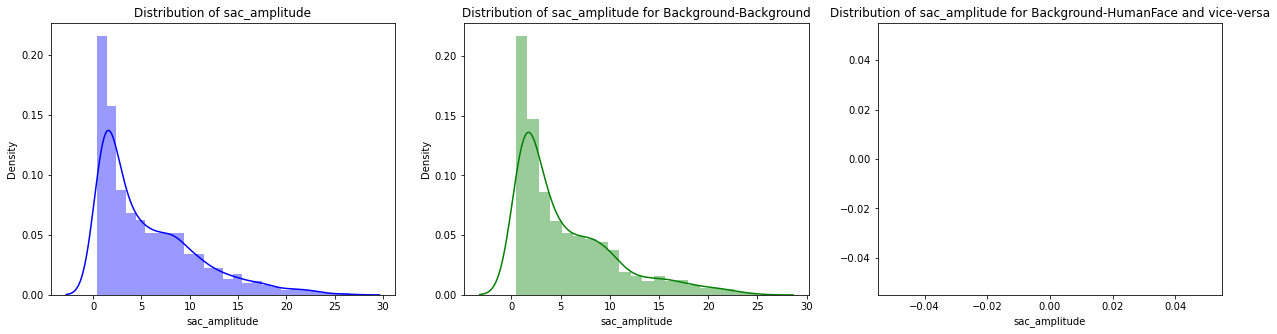

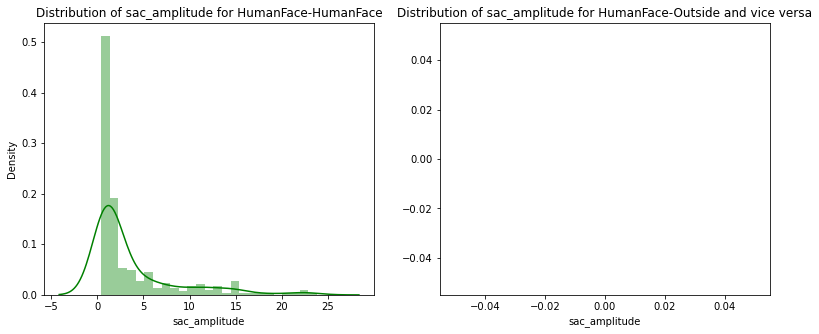

In [207]:
Plot_dis('sac_amplitude')

It appears that we mostly have right skewed distribution and, 
- People are are spending more time in background to background fixation which seems strange! Normally we have tendency to look foreground objects in the image.
- People are are spending more time doing human to human fixation which seems okay. This supports the hypothesis that we have tendency to look foreground objects in the image.

Futhermore, we can see that most test subjects are either looking/exploring the image background and then the image foreground -- and we don't have a significant effect at the boundary i.e. between image foreground and background. It is like we are segmenting the image and looking at individual pieces.

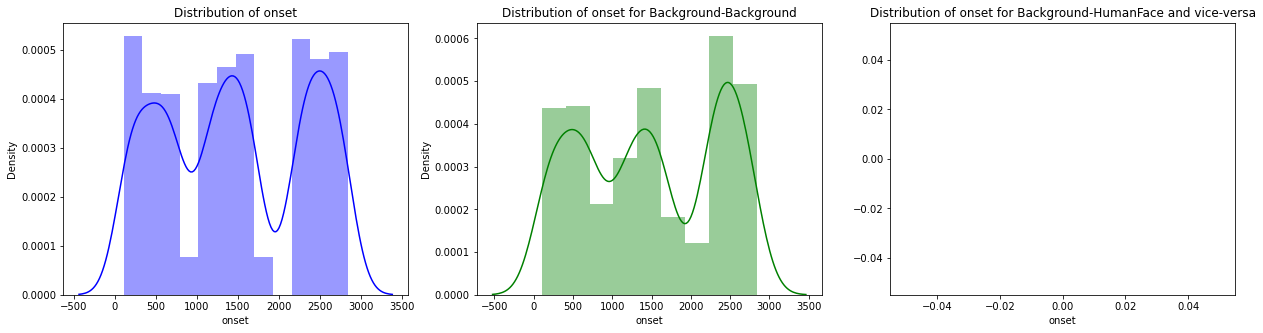

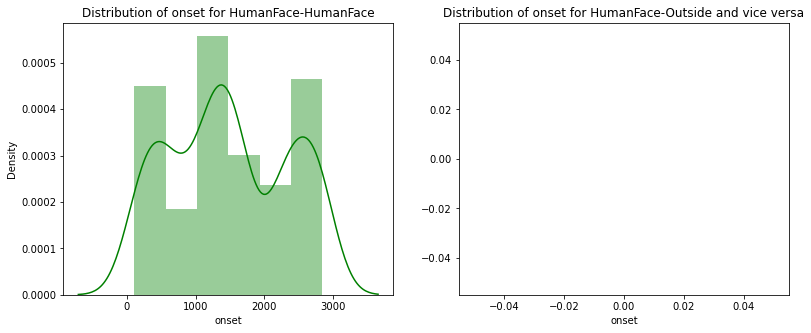

In [208]:
Plot_dis('onset')

It looks like the onset distribution is somewhat periodic with peaks at 500, 1500, 2500. 

Also, at the peak or at the middle of a period, the subjects have higher tendency of looking at the background of the image. 

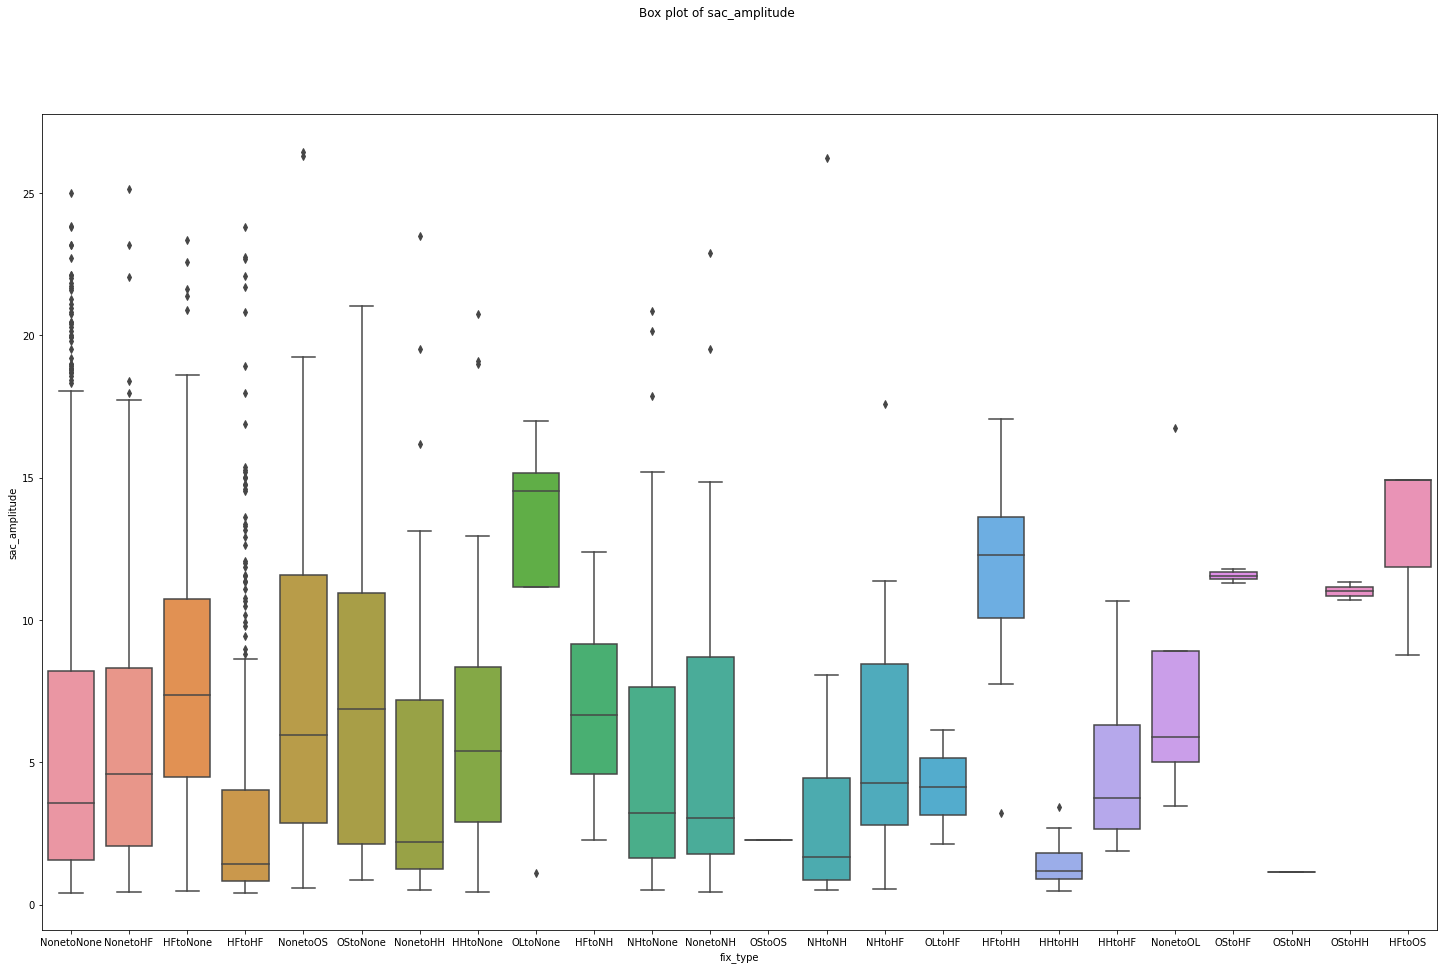

In [209]:
Plot_box('sac_amplitude')

### Plotting scatter plots for eye fixations

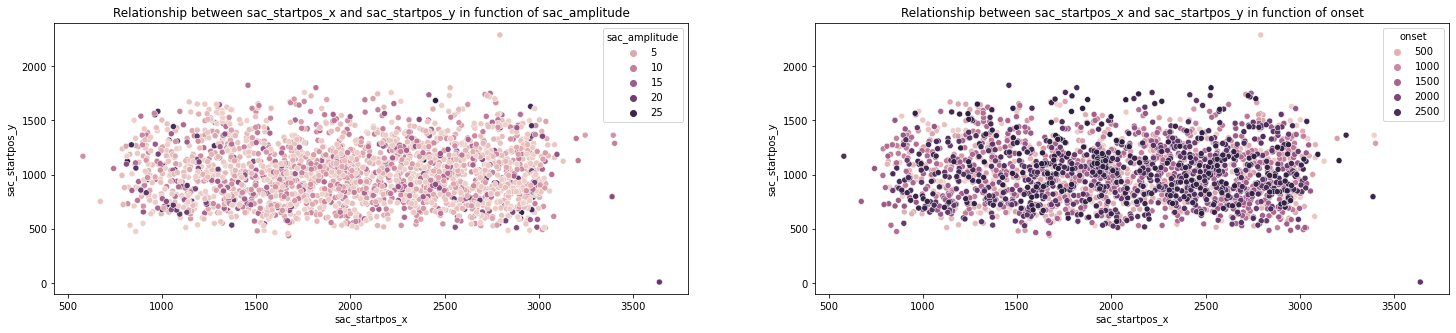

In [210]:
Plot_scat('sac_startpos_x', 'sac_startpos_y', 'sac_amplitude', 'onset')

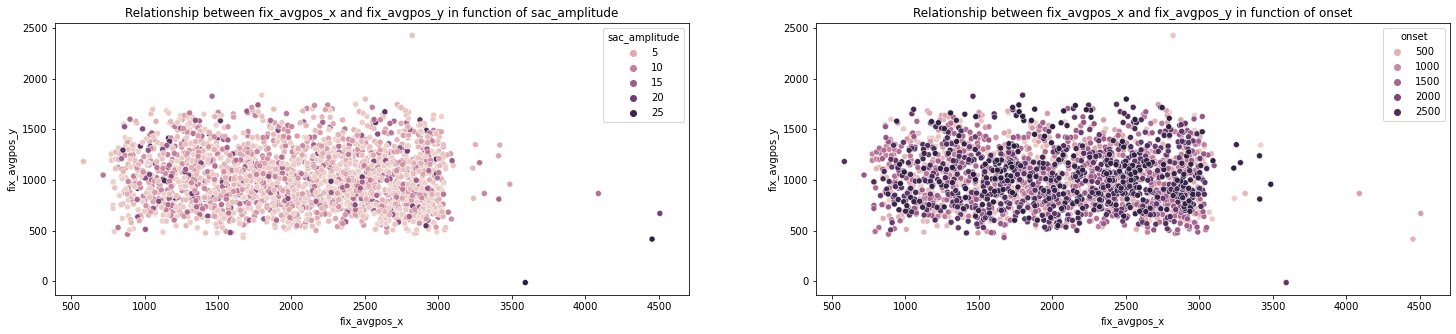

In [211]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_amplitude', 'onset')

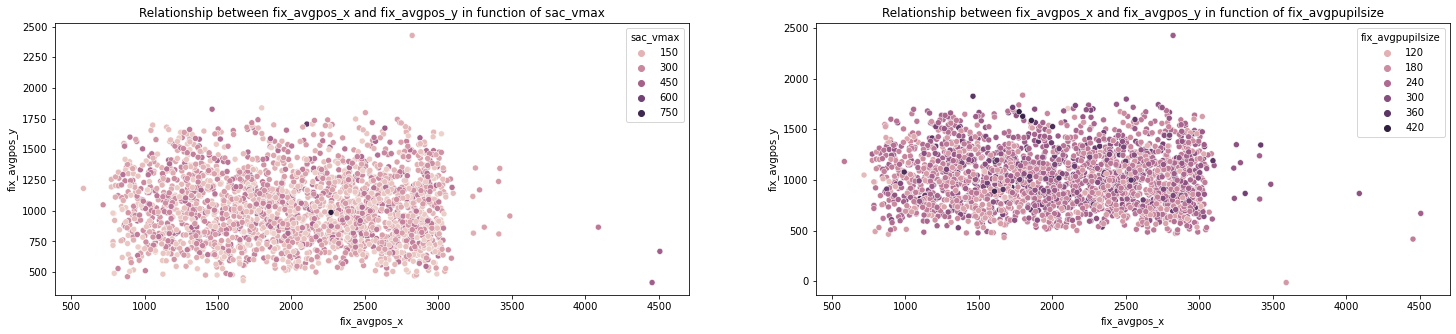

In [212]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_vmax', 'fix_avgpupilsize')

## Finding Correlation

Text(0.5, 1.0, 'Correlation between numerical parameters')

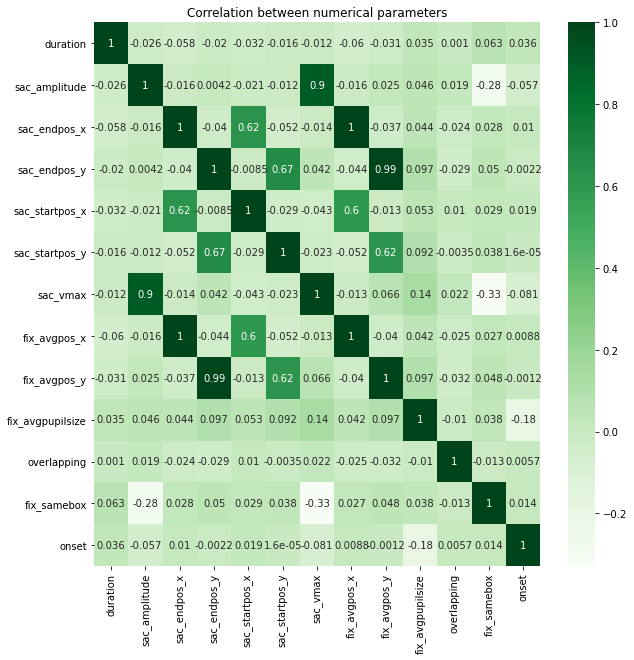

In [213]:
correlation = df[['duration', 'sac_amplitude', 'sac_endpos_x', 'sac_endpos_y', 'sac_startpos_x', 'sac_startpos_y', 'sac_vmax', 'fix_avgpos_x', 'fix_avgpos_y', 'fix_avgpupilsize', 'overlapping', 'fix_samebox', 'onset']].corr()

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(correlation, annot=True, cmap='Greens', ax=ax)
plt.title('Correlation between numerical parameters')

It appears that `sac_amplitude` and strong correlation with `sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize`

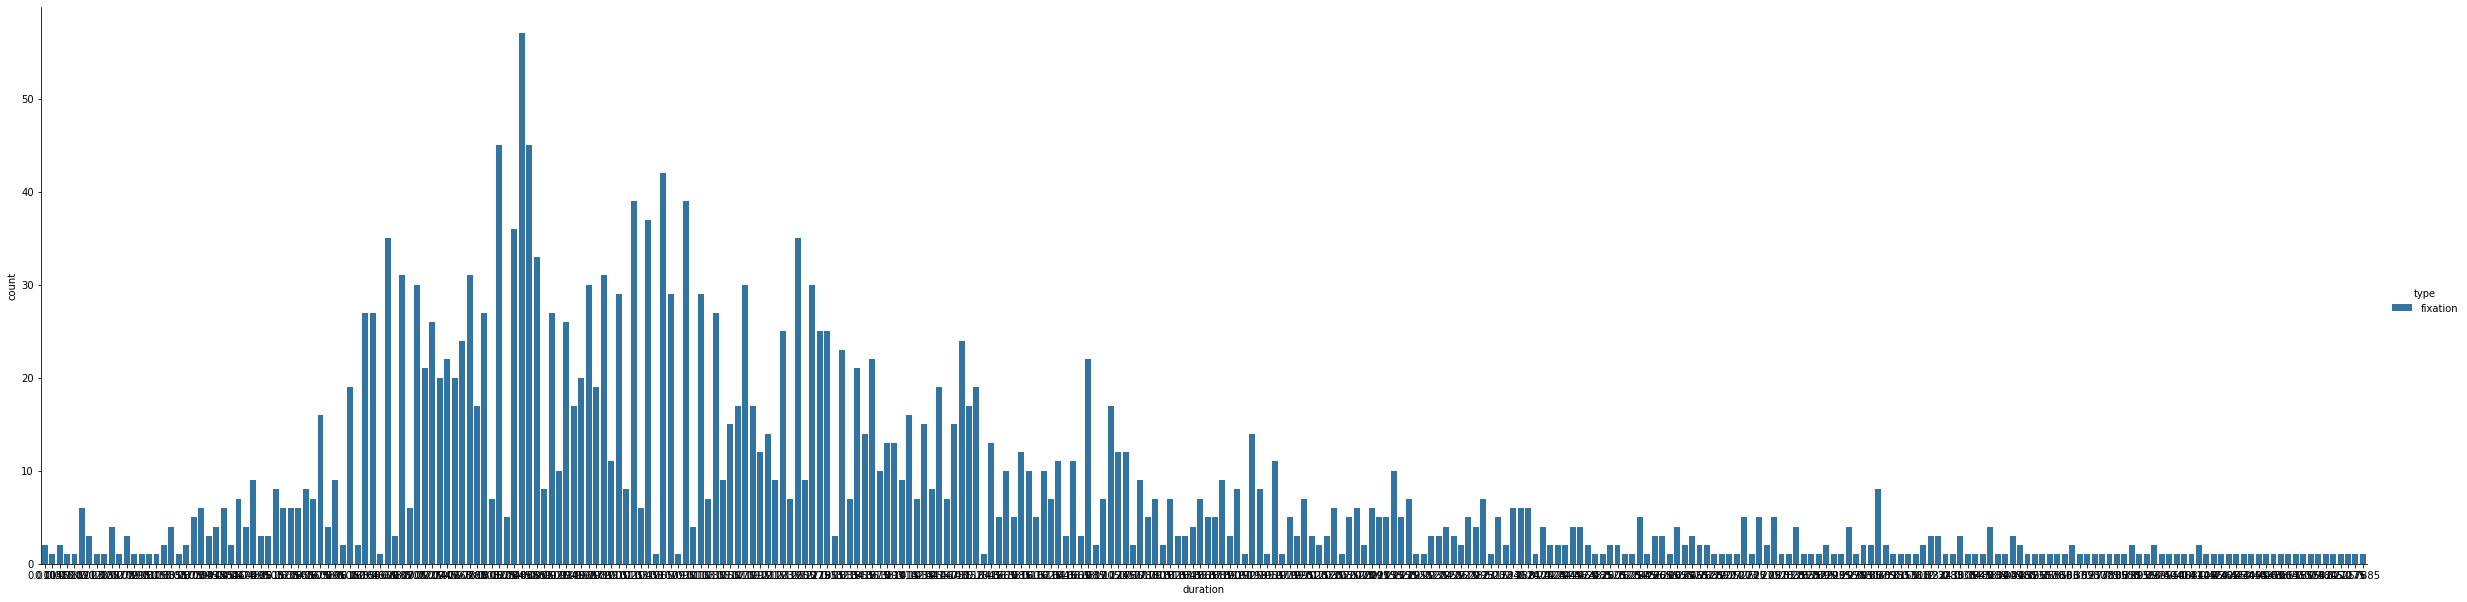

In [214]:
sns.catplot(x='duration', kind='count', hue='type', data=df, height=8.27, aspect=20/5)

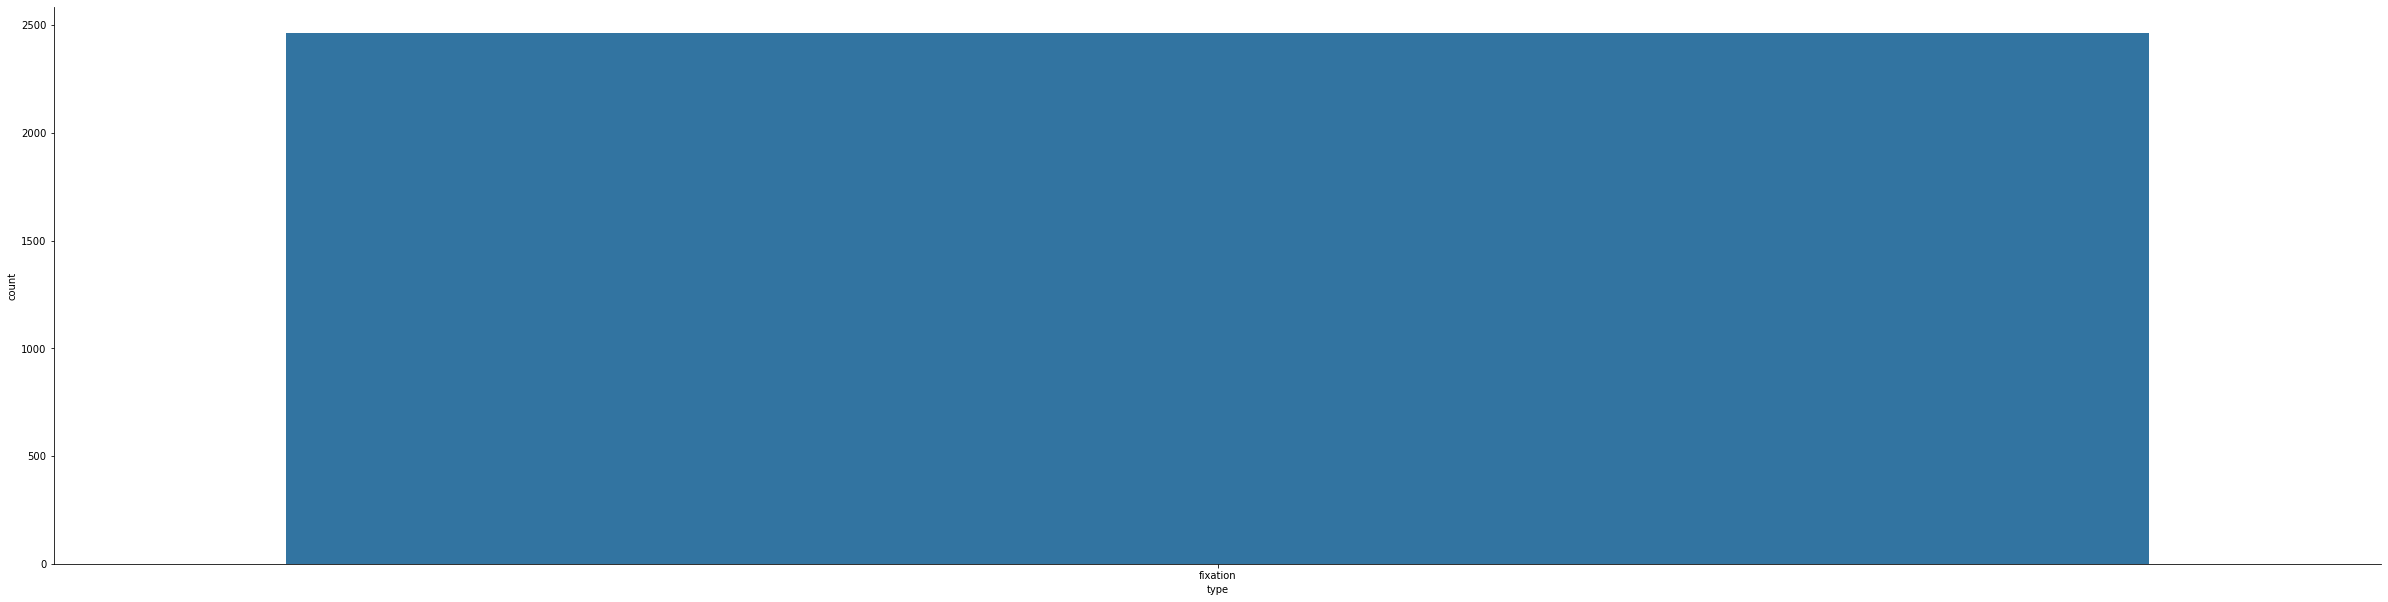

In [215]:
sns.catplot(kind='count', x='type',data=df, height=8.27, aspect=20/5)

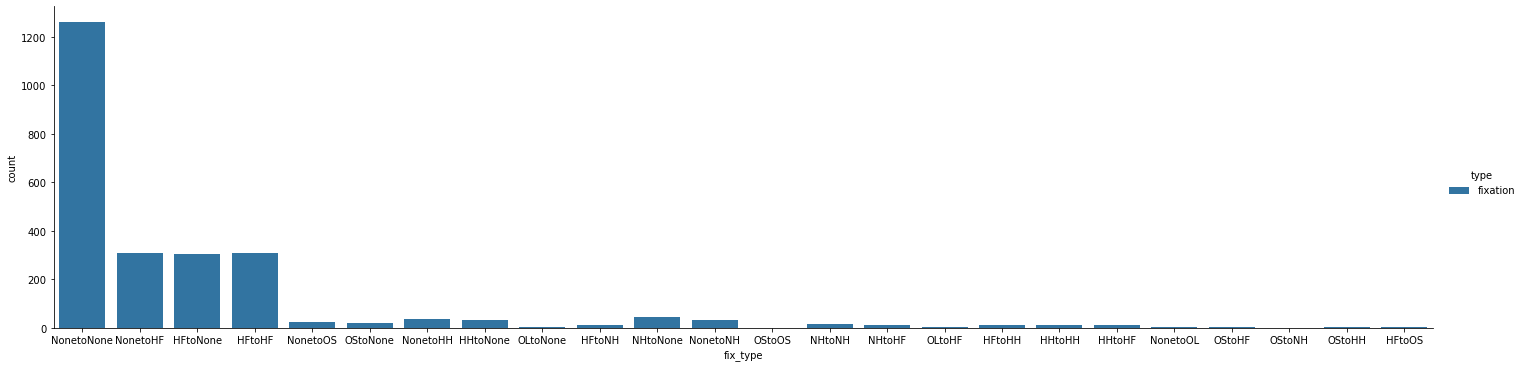

In [216]:
sns.catplot(x='fix_type',kind='count',hue='type',data=df, aspect=20/5)

In [217]:
# sns.jointplot(x='onset',y='sac_amplitude',data=df)

In [218]:
# sns.lmplot(y='sac_amplitude',x='onset',hue='fix_type',col='type',data=df)